In [1]:
EPOCHS = 10

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/data/blink_182.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional, Dense, Embedding, GlobalMaxPool1D, LSTM, MaxPooling1D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data = open(path).read()
print(data[0:20])
corpus = data.lower().split("\n")
print(corpus[0:10])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
# print(tokenizer.word_index)
print(total_words)


Can we forget about 
['can we forget about the things i said when i was drunk...', "i didn't mean to call you that", "i can't remember what was said", 'or what you threw at me please tell me', 'please tell me why', 'my car is in the front yard', 'and i am sleeping with my cloths on', 'i came in throught the window... last night', 'and your... gone', "gone it's no suprise to me i am my own worst enemy"]
1848


In [5]:
sequences = []
for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(tokens)):
    n_gram_seq = tokens[:i+1]
    sequences.append(n_gram_seq)

max_seq_len = max([len(x) for x in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_seq_len, padding='pre'))
print(sequences[:5,:])

xs, labels = sequences[:,:-1], sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  59  16]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  59  16 176]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  59  16 176 152]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   59  16 176 152   2]
 [  0   0   0   0   

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(total_words, activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 100)           184800    
                                                                 
 bidirectional (Bidirection  (None, 58, 300)           301200    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 300)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1848)              556248    
                                                                 
Total params: 1042248 (3.98 MB)
Trainable params: 1042248 (3.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
545/545 [==============================] - 23s 23ms/step - loss: 6.2265 - accuracy: 0.0411
Epoch 2/10
545/545 [==============================] - 6s 12ms/step - loss: 5.9685 - accuracy: 0.0490
Epoch 3/10
545/545 [==============================] - 6s 12ms/step - loss: 5.7289 - accuracy: 0.0701
Epoch 4/10
545/545 [==============================] - 7s 12ms/step - loss: 5.5160 - accuracy: 0.0973
Epoch 5/10
545/545 [==============================] - 6s 11ms/step - loss: 5.3462 - accuracy: 0.1211
Epoch 6/10
545/545 [==============================] - 7s 13ms/step - loss: 5.2114 - accuracy: 0.1309
Epoch 7/10
545/545 [==============================] - 7s 12ms/step - loss: 5.0719 - accuracy: 0.1475
Epoch 8/10
545/545 [==============================] - 7s 13ms/step - loss: 4.9251 - accuracy: 0.1673
Epoch 9/10
545/545 [==============================] - 7s 12ms/step - loss: 4.7912 - accuracy: 0.1885
Epoch 10/10
545/545 [==============================] - 7s 13ms/step - loss: 4.6999 - accur

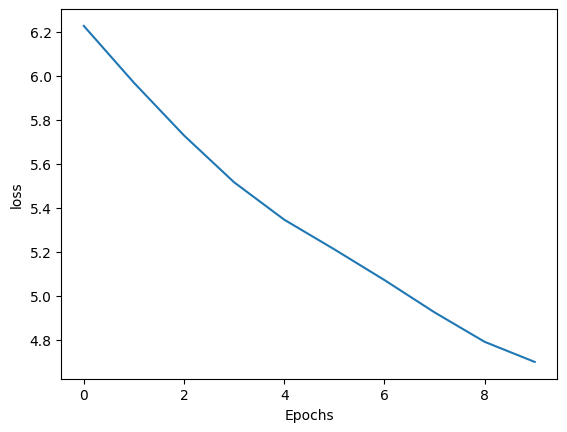

In [7]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor="loss", min_delta=0, patience=10, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=EPOCHS, verbose=1, callbacks=[es], shuffle=False)
model.save("blink_182")

plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

In [14]:
model = load_model("blink_182")
seed_text = "can we forget about the things"
next_words = 8

for _ in range(next_words):
  tokens = tokenizer.texts_to_sequences([seed_text])[0]
  tokens = pad_sequences([tokens], maxlen=max_seq_len-1, padding="pre")
  predicted_probas = model.predict(tokens, verbose=0)
  predicted_class = np.argmax(predicted_probas)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted_class:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

can we forget about the things i feel home home the last time i
